In [5]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
data_orig = pd.read_csv('../MA_PREDICTOR/data/ma_data_car.csv', parse_dates=['announcement_date'])
data_orig.head()

,id,announcement_date,deal_value,acquiror_total_assets,acquiror_name,acquiror_ticker,target_name,target_nation,acquiror_nation,target_status,...,shares_acquired,consideration_offered,attitude,acquisition_technique,acquiror_financial_advisor,target_financial_advisor,purpose,acquiror_code,target_code,car
0,1631732020,2005-01-01,12.00,3160.41,Plains All American Pipeline LP,PAA,Shell Pipeline Co LP-Crude Oil Pipeline Assets...,United States,United States,Subsidiary,...,100.0,Cash|Cash Only,Friendly,Financial Acquiror|Divestiture,NaN,NaN,Strengthen existing operations/expand presence...,50102030,50103030,0.006854
1,1653652020,2005-01-01,NaN,1680.57,Regis Corp,RGS,Scot Lewis Schools,United States,United States,Private,...,100.0,Unspecified,Friendly,Not Applicable,NaN,NaN,NaN,54201030,63103010,-0.010266
2,1949421020,2005-01-01,NaN,3301.76,Google Inc,GOOG,PhatBits,United States,United States,Private,...,100.0,Unspecified,Friendly,Not Applicable,NaN,NaN,NaN,57201030,57201020,0.007746
3,1652453040,2005-01-01,20.03,371.71,Graco Inc,GGG,Gusmer Europe SL,Spain,United States,Private,...,100.0,Cash|Cash Only,Friendly,Not Applicable,NaN,NaN,NaN,52102010,51101010,-0.011133
4,2721963020,2005-01-01,18220.52,NaN,Exxon Mobil Corp,XOM,Exxon Mobil Corp,United States,United States,Public,...,5.0,Cash|Cash Only,No Applicable,Open Market Purchase|Privately Negotiated Purc...,NaN,NaN,Other,50102030,50102030,-0.003971


In [102]:
data_orig.car.isna().sum()

0

In [8]:
data_orig.columns

Index(['id', 'announcement_date', 'deal_value', 'acquiror_total_assets',
       'acquiror_name', 'acquiror_ticker', 'target_name', 'target_nation',
       'acquiror_nation', 'target_status', 'acquiror_industry',
       'target_industry', 'shares_at_announcement', 'shares_acquired',
       'consideration_offered', 'attitude', 'acquisition_technique',
       'acquiror_financial_advisor', 'target_financial_advisor', 'purpose',
       'acquiror_code', 'target_code', 'car'],
      dtype='object')

# Scope

In [9]:
features = ['consideration_offered', 'attitude', 'acquisition_technique',
            'acquiror_financial_advisor', 'target_financial_advisor', 'purpose',
            'acquiror_code', 'target_code', 'car']

# Outliers

## Detecting outliers

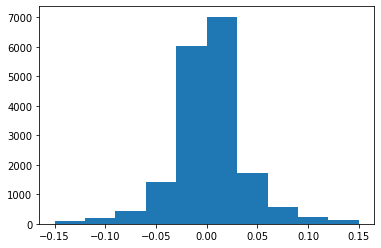

In [10]:
plt.hist(data_orig.car, range=(-0.15, 0.15));

## Excluding outliers

In [11]:
data = data_orig[(data_orig.car > -0.15) & (data_orig.car < 0.15)]

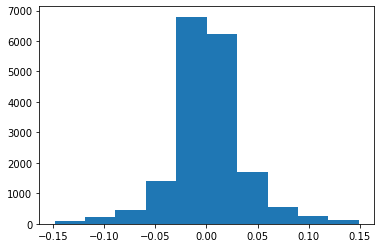

In [12]:
plt.hist(data.car);

# Features

## consideration_offered

In [13]:
tmp = data[['consideration_offered', 'car']]

In [14]:
tmp.consideration_offered

0        Cash|Cash Only
1           Unspecified
2           Unspecified
3        Cash|Cash Only
4        Cash|Cash Only
              ...      
18454    Cash Only|Cash
18455       Unspecified
18456       Unspecified
18457       Unspecified
18458       Unspecified
Name: consideration_offered, Length: 17823, dtype: object

In [15]:
# has to be transformed first -> everything that only has cash will be 'cash', rest 'other'

In [16]:
# transform pipes into list of all considerations

In [17]:
list_gen = lambda x: x.split('|')

tmp['consideration_offered'] = tmp.consideration_offered.apply(list_gen)

In [21]:
# Cluster considerations
def cash(considerations):
    
    for consideration in considerations:
        if 'Cash' not in consideration:
            return 'Other'
    return 'Cash'

# Apply
tmp['consideration_offered'] = tmp.apply(lambda row: cash(row.consideration_offered), axis=1)

/var/folders/z8/077xt3wd30j28k4_3vtz7gn00000gn/T/ipykernel_73042/3051038063.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['consideration_offered'] = tmp.apply(lambda row: cash(row.consideration_offered), axis=1)


### Distribution

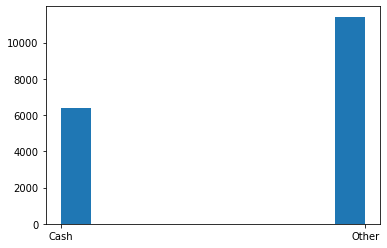

In [23]:
plt.hist(tmp.consideration_offered);

### Impact on target

In [36]:
tmp.groupby(by='consideration_offered').mean()

,car
consideration_offered,
Cash,0.003427
Other,0.001090


In [37]:
tmp.car.mean() # to show that on average, cash performs better than non-cash

0.0019291859304173993

## Attitude

In [39]:
data.attitude.unique()

array(['Friendly', 'No Applicable', 'Neutral', 'Hostile', 'Unsolicited'],
      dtype=object)

### Distribution

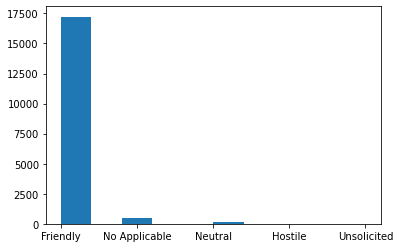

In [41]:
plt.hist(data.attitude);

### Impact on target

<AxesSubplot:xlabel='attitude'>

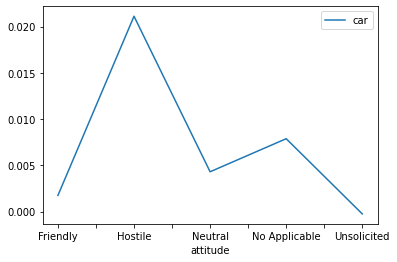

In [73]:
data.groupby(by='attitude').mean()[['car']].plot()

In [75]:
data.attitude.value_counts() # shows us that this is not meaningful, with only 3 observations

Friendly         17224
No Applicable      469
Neutral            121
Unsolicited          6
Hostile              3
Name: attitude, dtype: int64

In [76]:
features

['consideration_offered',
 'attitude',
 'acquisition_technique',
 'acquiror_financial_advisor',
 'target_financial_advisor',
 'purpose',
 'acquiror_code',
 'target_code',
 'car']

## acquisition_techniques

In [77]:
# to be ignored for now

## acquiror_financial_advisor (target_financial_advisor)

In [78]:
# to be ignored for now

## purpose

In [79]:
# to be ignored for now

## industry_relatedness (acquiror_code, target_code)

**Relatedness from top to bottom:**
1. Same industry (Iron & Steel)
2. Same industry group (Metals & Mining)
3. Same business sector (Mineral Resources)
4. Same economic sector (Basic Materials)
5. Not related

In [85]:
tmp = data[['car']]

In [80]:
# codes have to be transformed first

In [83]:
def relatedness(acquiror, target):
    if acquiror == target:
        return 'industry'
    elif acquiror[:6] == target[:6]:
        return 'industry_group'
    elif acquiror[:4] == target[:4]:
        return 'business_sector'
    elif acquiror[:2] == target[:2]:
        return 'economic_sector'
    else:
        return 'not_related'

In [87]:
tmp['relatedness'] = data.apply(lambda row: relatedness(str(row.acquiror_code), str(row.target_code)), axis=1)

/var/folders/z8/077xt3wd30j28k4_3vtz7gn00000gn/T/ipykernel_73042/436178826.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['relatedness'] = data.apply(lambda row: relatedness(str(row.acquiror_code), str(row.target_code)), axis=1)


In [98]:
tmp.relatedness.value_counts()

industry           7166
not_related        5838
industry_group     1891
economic_sector    1565
business_sector    1363
dtype: int64

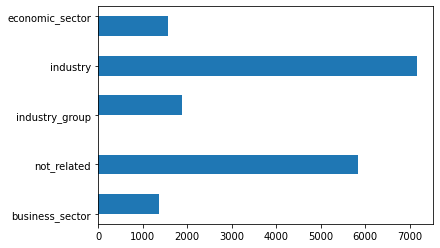

In [94]:
plt.hist(tmp.relatedness, orientation='horizontal');